In [1]:
%%time
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt_obj
from datetime import timedelta
from scipy.stats import norm

# Function to convert string to date_time object
def to_date(tstr):
    year   = int(tstr[:4])
    month  = int(tstr[5:7])
    day    = int(tstr[8:10])
    hour   = int(tstr[11:13])
    minute = int(tstr[14:16])
    return dt_obj(year, month, day, hour, minute)

# Function to convert into numpy array
def to_array(List):
    l = np.array(List)
    l = l.flatten()
    return l 

Wall time: 2.11 s


In [2]:
%%time
# Importing the dataset
df = pd.read_csv('Robust_Scaled.csv', low_memory=False)

# Drop the unwanted column
df = df.drop(columns = ['Unnamed: 0'])
df

Wall time: 48.1 s


,T_REC,HARPNUM,NOAA_ARS,NOAA_AR,LON_FWT,LAT_FWT,TOTUSJH,TOTPOT,TOTUSJZ,ABSNJZH,...,MEANALP,date_time,Max,Type,Reg,CLASS,class,X_or_M,flare_index,LOOK
0,2010.05.02_00:00:00_TAI,1,11067,11067,-65.205566,24.177683,0.431914,0.173426,0.407741,0.274315,...,-0.230618,2010-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010.05.02_00:12:00_TAI,1,11067,11067,-64.984444,24.106541,0.438265,0.177587,0.411025,0.617566,...,-0.364324,2010-05-02 00:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010.05.02_00:24:00_TAI,1,11067,11067,-64.888580,24.135088,0.464960,0.185259,0.431423,0.594062,...,-0.351642,2010-05-02 00:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010.05.02_00:36:00_TAI,1,11067,11067,-64.758209,24.144226,0.474002,0.218677,0.440990,0.475601,...,-0.299244,2010-05-02 00:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010.05.02_00:48:00_TAI,1,11067,11067,-64.534355,24.097631,0.510769,0.256765,0.575643,0.179632,...,-0.182030,2010-05-02 00:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651015,2021.12.30_23:12:00_TAI,7912,12923,12923,37.216583,-28.806856,-0.236217,-0.102187,-0.244133,-0.221606,...,0.253028,2021-12-30 23:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651016,2021.12.30_23:24:00_TAI,7912,12923,12923,37.328621,-28.814804,-0.229918,-0.100139,-0.236267,-0.246687,...,-0.018686,2021-12-30 23:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651017,2021.12.30_23:36:00_TAI,7912,12923,12923,37.393547,-28.820169,-0.221924,-0.097421,-0.225549,-0.204925,...,-0.418455,2021-12-30 23:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651018,2021.12.30_23:48:00_TAI,7912,12923,12923,37.471878,-28.819061,-0.220019,-0.097749,-0.222000,-0.208777,...,-0.362545,2021-12-30 23:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Converting date_time from str to date_time object
date_time = df.iloc[:,0]
date_time = [to_date(i) for i in date_time]
df.loc[:,'date_time'] = date_time

First thing we want to plot is the distribution of flares, wether they are occured before or after the peak of each parameters. 

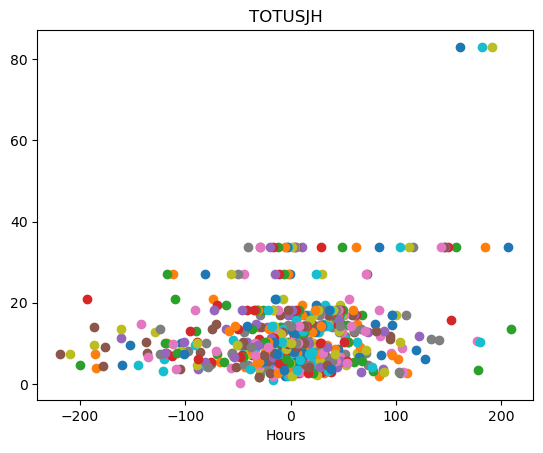

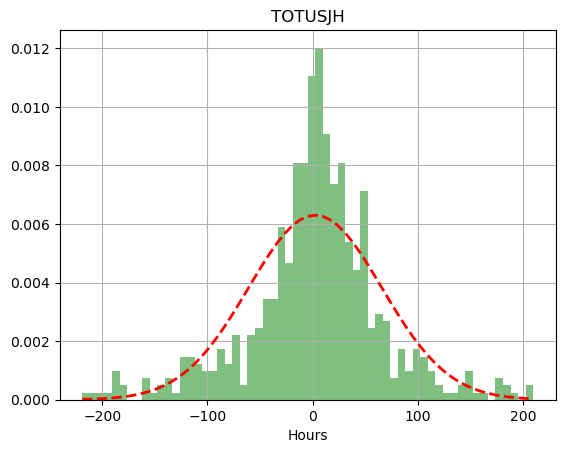

mean: 2.4266199649737303 hours
std:63.31678445170688 hours
Flare happened before peaks: 55.86690017513135%
Flare happened after peaks: 44.13309982486865%


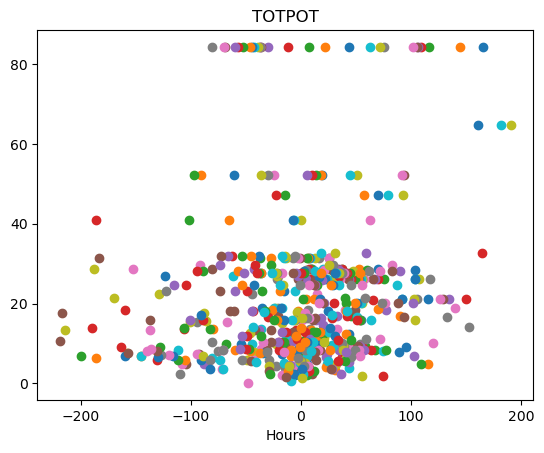

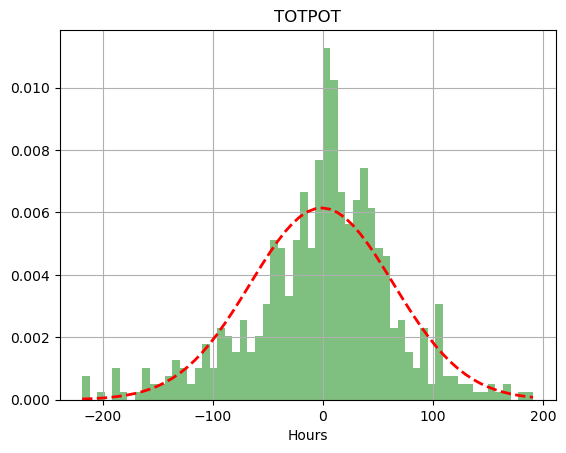

mean: -1.074956217162872 hours
std:64.92991549527846 hours
Flare happened before peaks: 55.516637478108585%
Flare happened after peaks: 44.483362521891415%


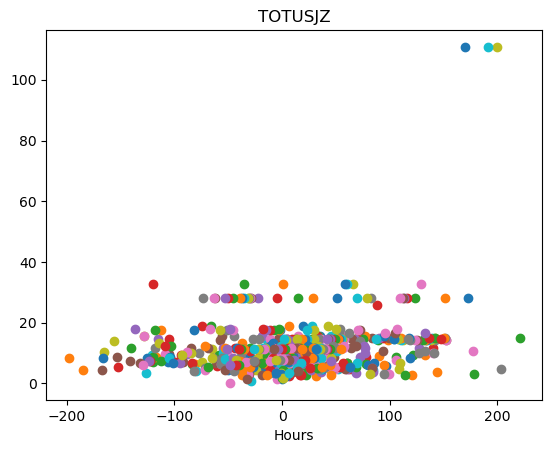

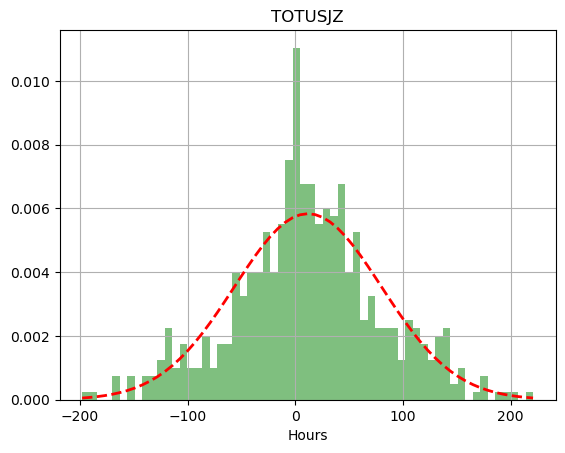

mean: 11.71663747810858 hours
std:68.38449594291056 hours
Flare happened before peaks: 58.31873905429072%
Flare happened after peaks: 41.68126094570928%


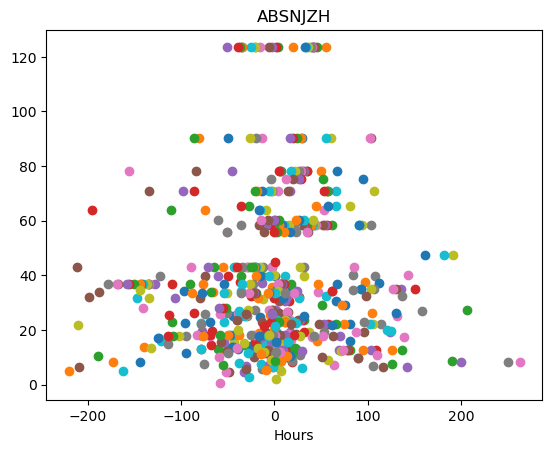

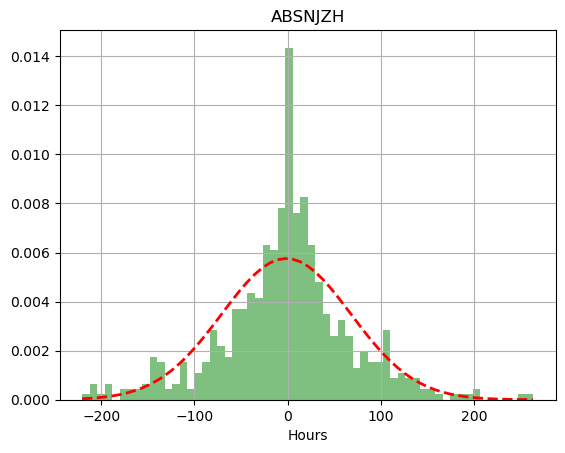

mean: -1.5558669001751324 hours
std:69.3150376510301 hours
Flare happened before peaks: 51.66374781085814%
Flare happened after peaks: 48.33625218914186%


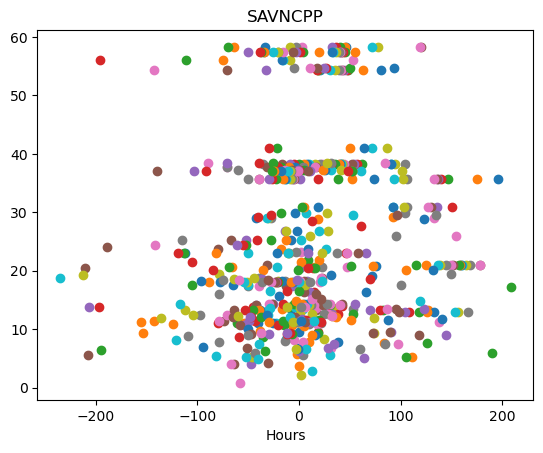

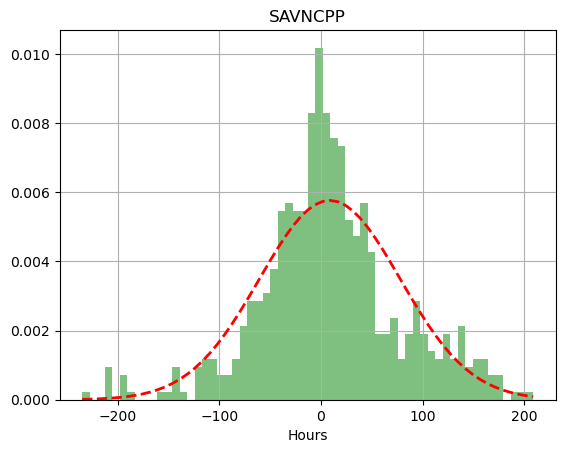

mean: 8.634325744308232 hours
std:69.18211767994661 hours
Flare happened before peaks: 55.166374781085814%
Flare happened after peaks: 44.833625218914186%


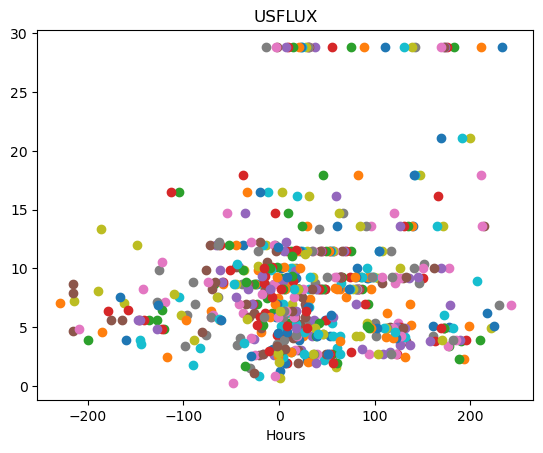

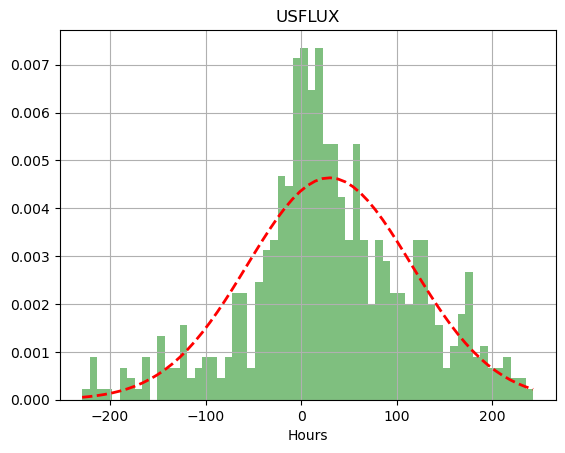

mean: 29.54500875656742 hours
std:86.02111736489884 hours
Flare happened before peaks: 65.8493870402802%
Flare happened after peaks: 34.15061295971979%


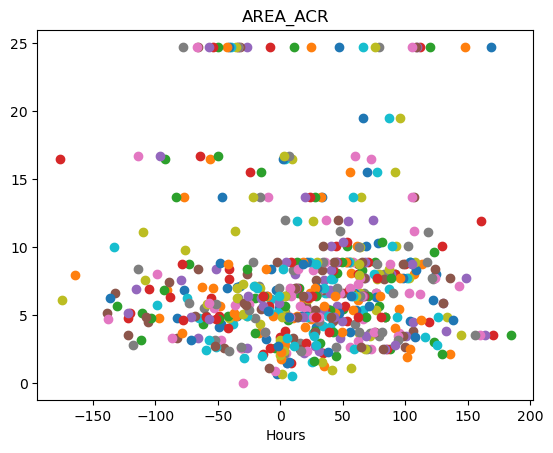

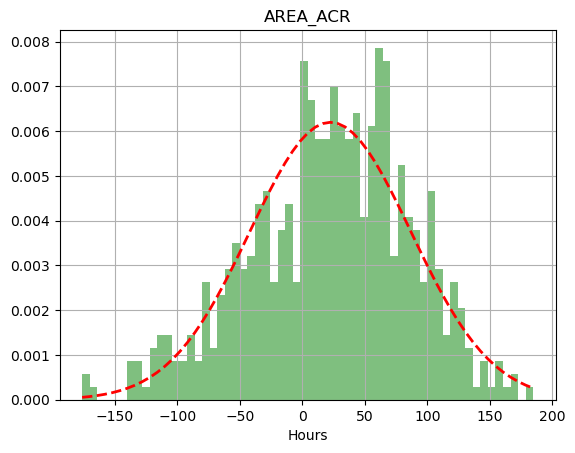

mean: 22.414711033274955 hours
std:64.37227482443328 hours
Flare happened before peaks: 67.42556917688266%
Flare happened after peaks: 32.57443082311734%


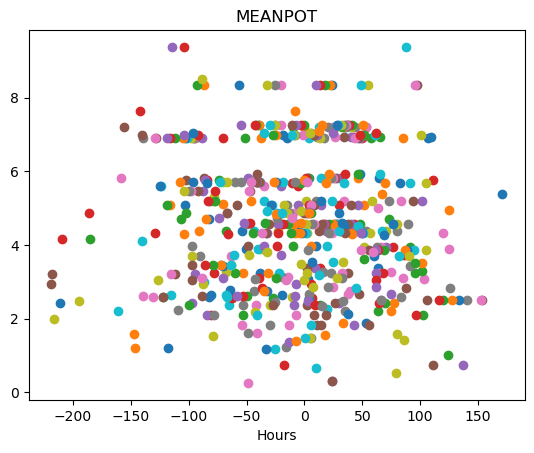

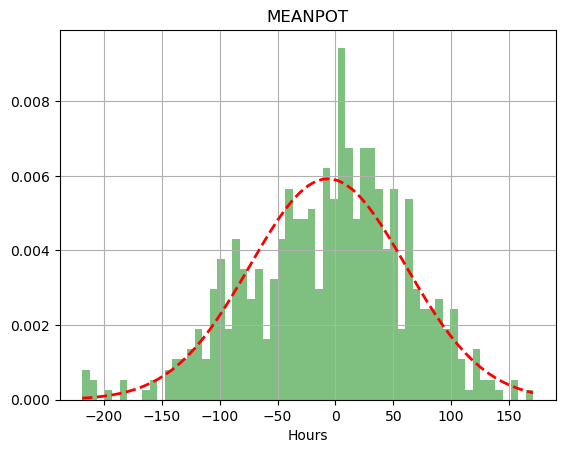

mean: -6.602802101576183 hours
std:67.34984538519129 hours
Flare happened before peaks: 51.13835376532399%
Flare happened after peaks: 48.86164623467601%


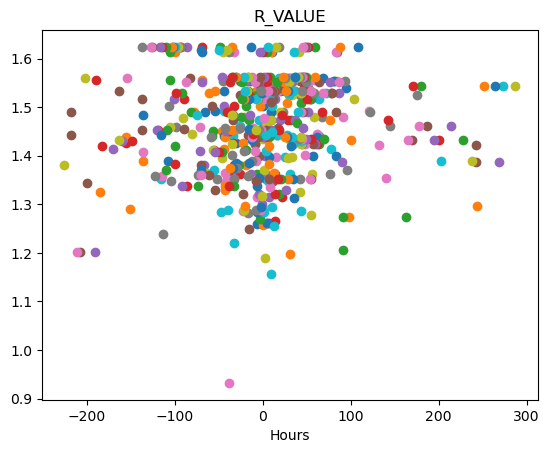

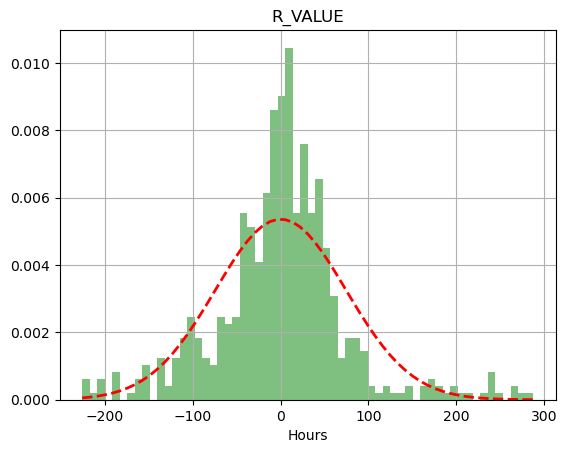

mean: 0.1905429071803868 hours
std:74.43137566169688 hours
Flare happened before peaks: 53.239929947460595%
Flare happened after peaks: 46.760070052539405%


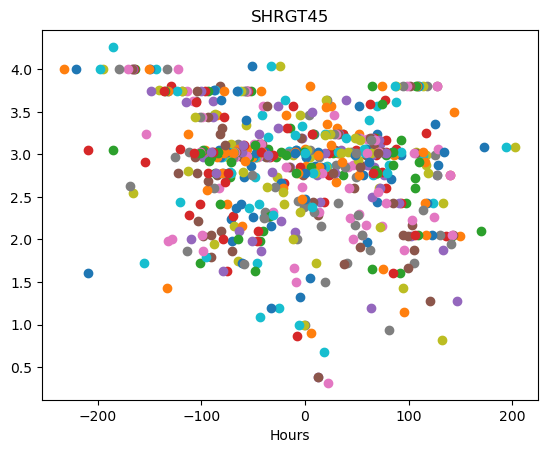

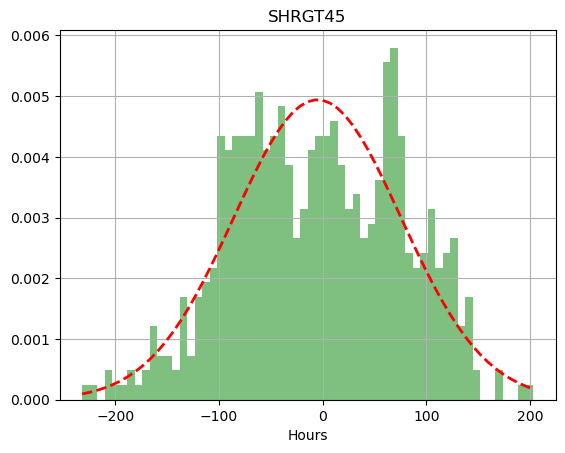

mean: -5.04413309982487 hours
std:80.74537705446082 hours
Flare happened before peaks: 47.8108581436077%
Flare happened after peaks: 52.1891418563923%


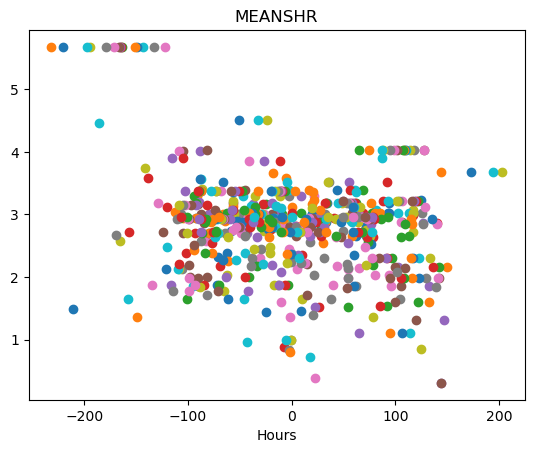

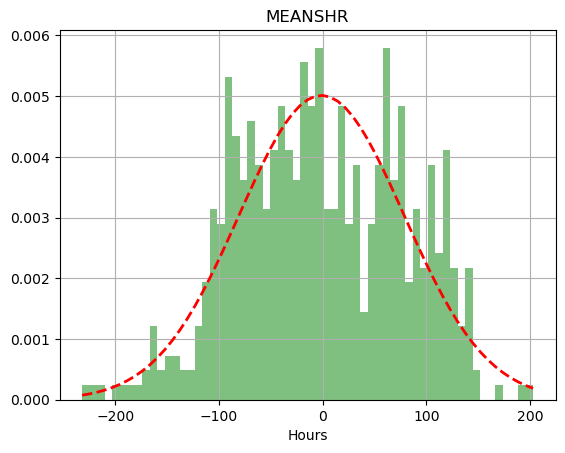

mean: -1.0357267950963216 hours
std:79.60062210078851 hours
Flare happened before peaks: 46.93520140105079%
Flare happened after peaks: 53.06479859894921%


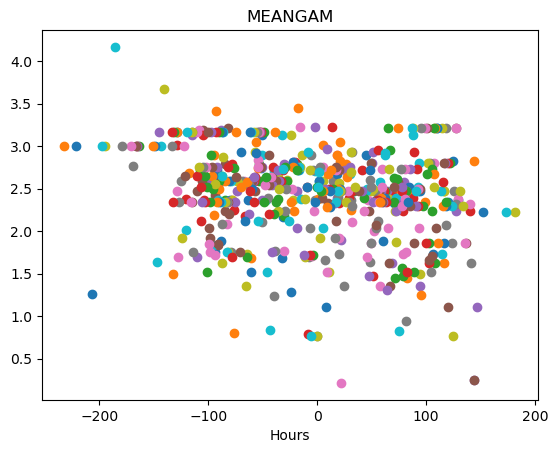

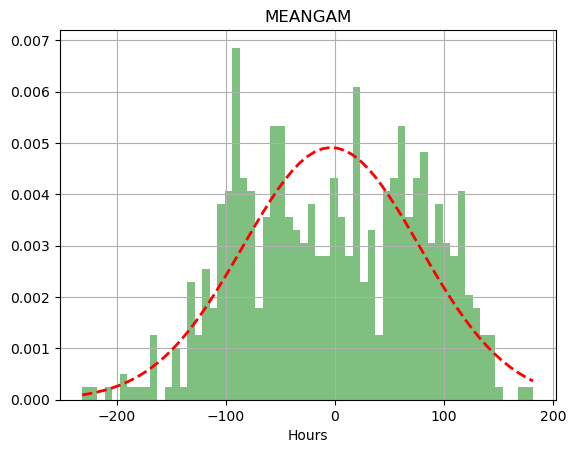

mean: -3.447635726795095 hours
std:81.20851266607757 hours
Flare happened before peaks: 49.03677758318739%
Flare happened after peaks: 50.96322241681261%


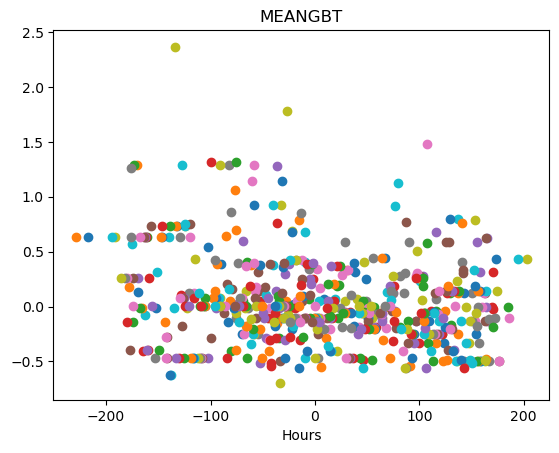

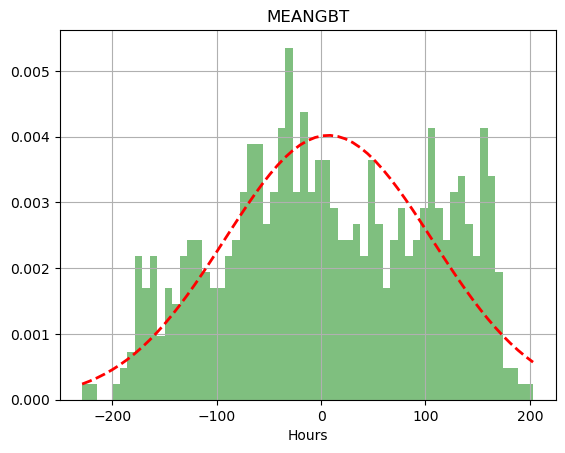

mean: 6.994395796847637 hours
std:99.20763400363862 hours
Flare happened before peaks: 50.08756567425569%
Flare happened after peaks: 49.91243432574431%


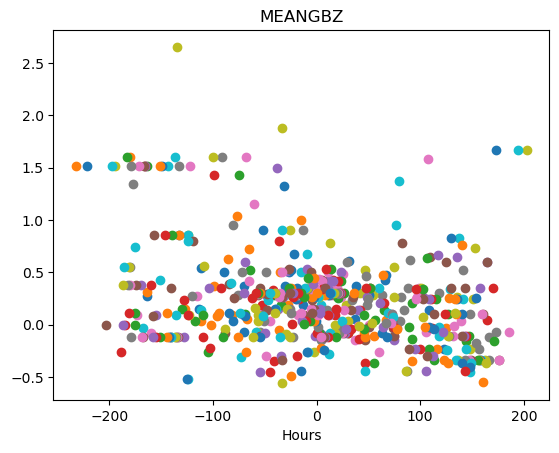

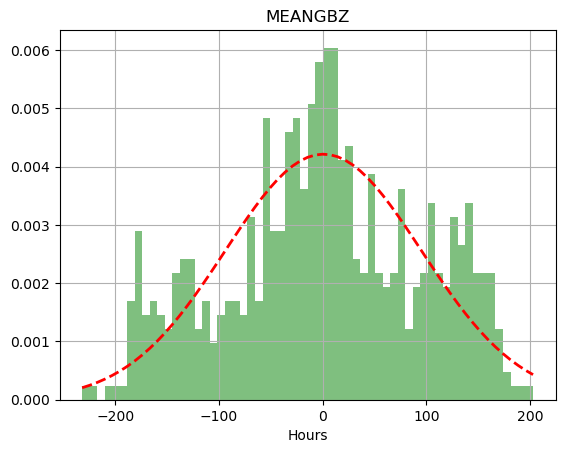

mean: 0.712784588441331 hours
std:94.70089124860094 hours
Flare happened before peaks: 50.61295971978984%
Flare happened after peaks: 49.38704028021016%


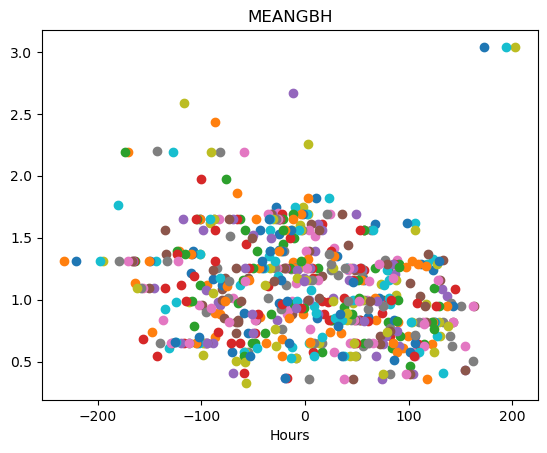

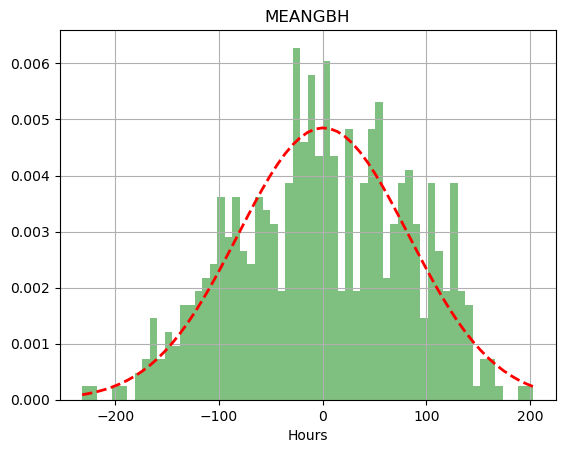

mean: 0.5905429071803826 hours
std:82.24468287692899 hours
Flare happened before peaks: 50.26269702276708%
Flare happened after peaks: 49.73730297723292%


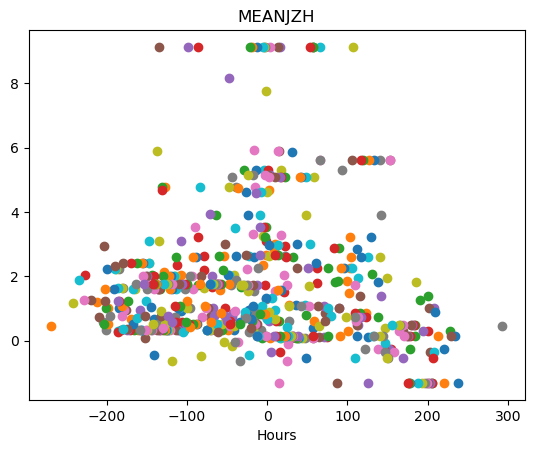

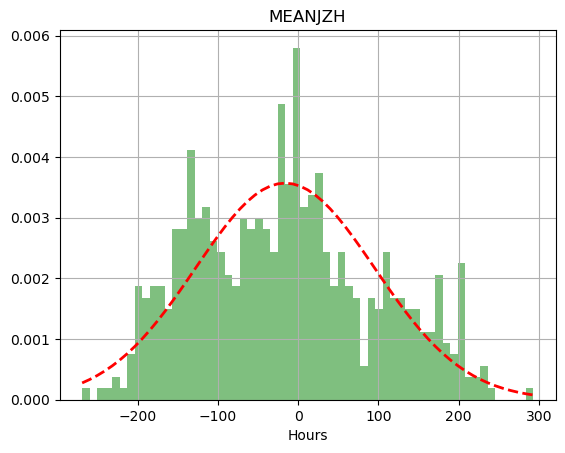

mean: -16.1922942206655 hours
std:111.78065622904414 hours
Flare happened before peaks: 41.85639229422067%
Flare happened after peaks: 58.14360770577933%


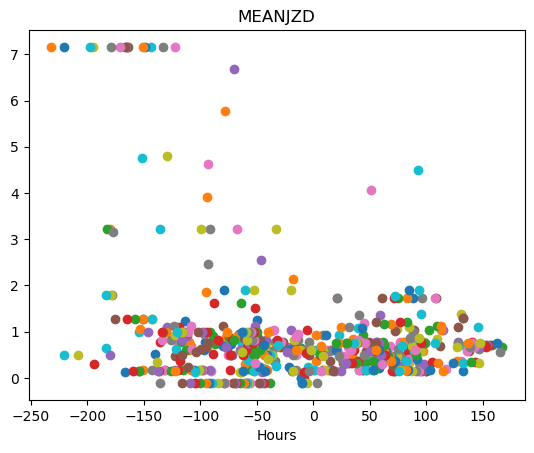

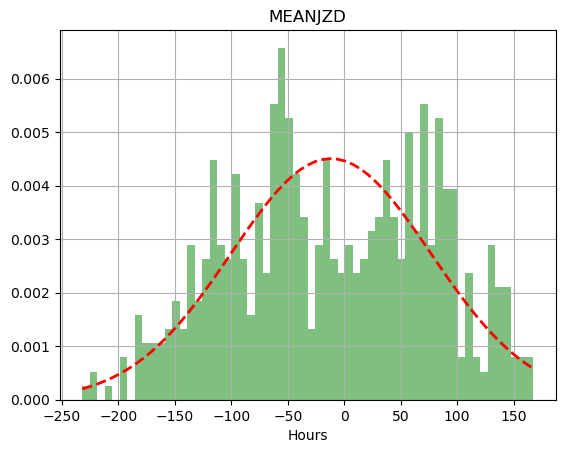

mean: -11.796847635726797 hours
std:88.56346942253997 hours
Flare happened before peaks: 45.884413309982484%
Flare happened after peaks: 54.115586690017516%


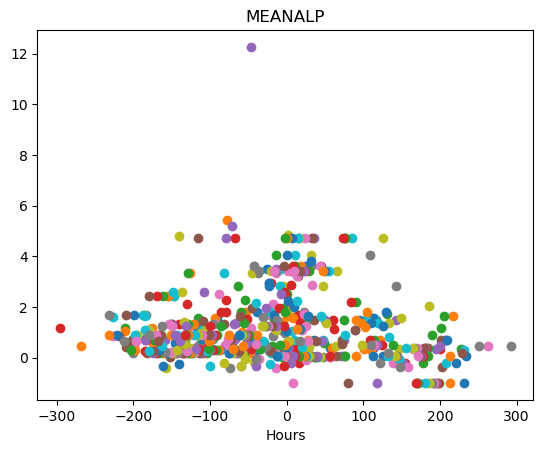

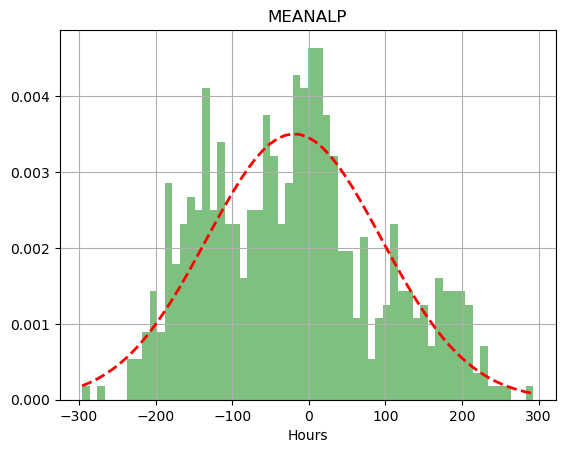

mean: -19.250087565674253 hours
std:113.78547338558874 hours
Flare happened before peaks: 42.03152364273205%
Flare happened after peaks: 57.96847635726795%
Wall time: 3min 18s


In [9]:
%%time
# First get the X and M class flare events
X_and_M = df.loc[df['X_or_M'] == 'Y']
# Get the HARPNUM and flare_index of each flares
HARPNUM = to_array(X_and_M.HARPNUM)
flare_index = to_array(X_and_M['flare_index'])
# Get the names of used columns
cols = ['TOTUSJH', 'TOTPOT', 'TOTUSJZ', 'ABSNJZH', 'SAVNCPP', 'USFLUX',
       'AREA_ACR', 'MEANPOT', 'R_VALUE', 'SHRGT45', 'MEANSHR', 'MEANGAM',
       'MEANGBT', 'MEANGBZ', 'MEANGBH', 'MEANJZH', 'MEANJZD', 'MEANALP']


# Do iteration for each column
for j in cols:
    # Make a blank list to store timestamp of maximum of each parameter 
    maxtime = []
    # Do iteration for each flare
    for i in range(len(X_and_M)):
        # Get the time series of the AR which contain the flare
        data = df.loc[df['HARPNUM'] == (df.loc[df['flare_index'] == flare_index[i]].HARPNUM.iloc[0])]
        # Get the timestamp of the flare
        zero = data.loc[data['flare_index'] == flare_index[i]].date_time.iloc[0]
        # Set the timestamp as X axis
        X = to_array(data['date_time'])
        # Transform the time into temporal distance from the flare occurance 
        X = to_array([(l - zero).total_seconds()/3600 for l in X])
        # Set the parameter values as Y axis
        Y = to_array(data[j])
        # Get the maximum position with respect to the timestamp of the flare 
        Y_max = np.max(Y)
        X_max = X[np.where(Y == Y_max)[0][0]]
        # Plot the maximum position with respect to flare timestamp
        plt.plot(X_max, Y_max, 'o')
        # Store the maximum position into a list
        maxtime.append(X_max)
    plt.title(j)
    plt.xlabel('Hours')
    plt.show()
    
    # Do a fitting for temporal distance between flare occurance and maximum value of the parameters 
    mu, sigma = norm.fit(maxtime)
    n, bins, patches = plt.hist(maxtime, 60, facecolor='green', density=1, alpha=0.5)
    y = norm.pdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--', linewidth=2)
    plt.xlabel('Hours')
    plt.title(j)
    plt.grid(True)
    plt.show()
    print('mean: ' + str(mu) + ' hours')
    print('std:' + str(sigma) + ' hours')
    
    # Counting the precentage of flare which happens before and after maxtime
    left = sum(1 if (x < 0) else 0 for x in maxtime)
    right = sum(1 if (x >= 0) else 0 for x in maxtime)
    print('Flare happened before peaks: ' + str(100*right/len(maxtime)) + '%')
    print('Flare happened after peaks: ' + str(100*left/len(maxtime)) + '%')